# EDA
Perform time series Exploratory Data Analysis (EDA) 
Data: pred_maint_timeseries_with_failures.csv


In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

!pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%run "variables.py"

In [3]:
%run "functions.ipynb"

# Data loading

Load the two CSV files, pred_maint_timeseries_with_failures.csv into pandas DataFrame.


In [4]:
# df = pd.read_csv(f'{DATA_DIR}/pred_maint_timeseries_with_failures.csv')
df = pd.read_csv(f'{DATA_DIR}/pred_maint_yearly_timeseries.csv')
display(df.head())

,machineid,datetimestamp,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
0,1,2025-01-01 00:00:00,302.483571,385.408617,303.238443,307.615149,298.829233,298.829315,103.158426
1,1,2025-01-01 00:10:00,303.837174,300.111109,297.861035,297.340913,299.412622,301.110395,98.464047
2,1,2025-01-01 00:20:00,299.877724,301.777757,302.085056,304.162309,298.533004,299.850807,100.190252
3,1,2025-01-01 00:30:00,303.323272,303.895963,294.494511,305.651141,301.865595,298.067635,97.682460
4,1,2025-01-01 00:40:00,297.766293,307.621208,301.614999,293.032915,289.108329,294.780518,100.345387


# Data Exploration

## Descriptive statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262800 entries, 0 to 262799
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   machineid              262800 non-null  int64  
 1   datetimestamp          262800 non-null  object 
 2   enginegastemperature1  262800 non-null  float64
 3   enginegastemperature2  262800 non-null  float64
 4   enginegastemperature3  262800 non-null  float64
 5   enginegastemperature4  262800 non-null  float64
 6   enginegastemperature5  262800 non-null  float64
 7   enginegastemperature6  262800 non-null  float64
 8   pressure               262800 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 18.0+ MB


In [6]:
exploreDataFrame(df=df, df_name= "Pred Maint")


Exploring DataFrame: Pred Maint

Shape: (262800, 9) 

Data Types:
 machineid                  int64
datetimestamp             object
enginegastemperature1    float64
enginegastemperature2    float64
enginegastemperature3    float64
enginegastemperature4    float64
enginegastemperature5    float64
enginegastemperature6    float64
pressure                 float64
dtype: object 

Missing Values:
 machineid                0
datetimestamp            0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64 



In [7]:
display(df.describe())

,machineid,enginegastemperature1,enginegastemperature2,enginegastemperature3,enginegastemperature4,enginegastemperature5,enginegastemperature6,pressure
count,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000,262800.000000
mean,3.000000,301.013095,301.016729,300.996511,300.980933,301.002924,300.982290,99.996008
std,1.414216,10.181835,10.160601,10.060855,10.009863,10.107151,9.974609,2.000245
min,1.000000,274.324401,278.760206,277.104182,274.785904,277.900384,277.166279,90.433522
25%,2.000000,296.674232,296.682120,296.683983,296.678426,296.679900,296.675540,98.646120
50%,3.000000,300.084453,300.100254,300.099518,300.071746,300.084915,300.099168,99.991422
75%,4.000000,303.516394,303.533216,303.519672,303.530490,303.525391,303.547541,101.345205
max,5.000000,411.196321,411.948091,411.385510,412.125814,414.453470,410.752224,109.312485


In [8]:
# enginegastemperature1
# In a normal distribution, the mean ≈ median.
mean = df['enginegastemperature1'].mean()
median = df['enginegastemperature1'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 301.0130949163999, Median: 300.08445316148004


In [9]:
print("Skewness:", df['enginegastemperature1'].skew())
print("Kurtosis:", df['enginegastemperature1'].kurt())

Skewness: 5.837478914160661
Kurtosis: 45.13267476042771


### Null values

In [10]:
display(df.isnull().sum())

machineid                0
datetimestamp            0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64

In [11]:
# Verify if there no any number
display(df.isna().sum())

machineid                0
datetimestamp            0
enginegastemperature1    0
enginegastemperature2    0
enginegastemperature3    0
enginegastemperature4    0
enginegastemperature5    0
enginegastemperature6    0
pressure                 0
dtype: int64

### Duplicated values

In [12]:
df.duplicated().any

<bound method Series.any of 0         False
1         False
2         False
3         False
4         False
          ...  
262795    False
262796    False
262797    False
262798    False
262799    False
Length: 262800, dtype: bool>

### Index

In [13]:
df.index

RangeIndex(start=0, stop=262800, step=1)

In [14]:
df = df.set_index('datetimestamp')

In [15]:
df.index

Index(['2025-01-01 00:00:00', '2025-01-01 00:10:00', '2025-01-01 00:20:00',
       '2025-01-01 00:30:00', '2025-01-01 00:40:00', '2025-01-01 00:50:00',
       '2025-01-01 01:00:00', '2025-01-01 01:10:00', '2025-01-01 01:20:00',
       '2025-01-01 01:30:00',
       ...
       '2025-12-31 22:20:00', '2025-12-31 22:30:00', '2025-12-31 22:40:00',
       '2025-12-31 22:50:00', '2025-12-31 23:00:00', '2025-12-31 23:10:00',
       '2025-12-31 23:20:00', '2025-12-31 23:30:00', '2025-12-31 23:40:00',
       '2025-12-31 23:50:00'],
      dtype='object', name='datetimestamp', length=262800)

## Analyze features

In [16]:
analyzeDFFeatures(df=df, df_name= "Pred Maint")

DataFrame: Pred Maint


Numerical Features:

           machineid  enginegastemperature1  enginegastemperature2  \
count  262800.000000          262800.000000          262800.000000   
mean        3.000000             301.013095             301.016729   
std         1.414216              10.181835              10.160601   
min         1.000000             274.324401             278.760206   
25%         2.000000             296.674232             296.682120   
50%         3.000000             300.084453             300.100254   
75%         4.000000             303.516394             303.533216   
max         5.000000             411.196321             411.948091   

       enginegastemperature3  enginegastemperature4  enginegastemperature5  \
count          262800.000000          262800.000000          262800.000000   
mean              300.996511             300.980933             301.002924   
std                10.060855              10.009863              10.107151   
min         

## Outliers

In [17]:
# Function to find outliers in a single DataFrame
findOutliersDF(df=df, df_name= "Pred Maint")


Potential outliers in machineid:
 0

Potential outliers in enginegastemperature1:
 5244

Potential outliers in enginegastemperature2:
 5135

Potential outliers in enginegastemperature3:
 5087

Potential outliers in enginegastemperature4:
 5006

Potential outliers in enginegastemperature5:
 5107

Potential outliers in enginegastemperature6:
 4988

Potential outliers in pressure:
 1828


## Time Series Plot

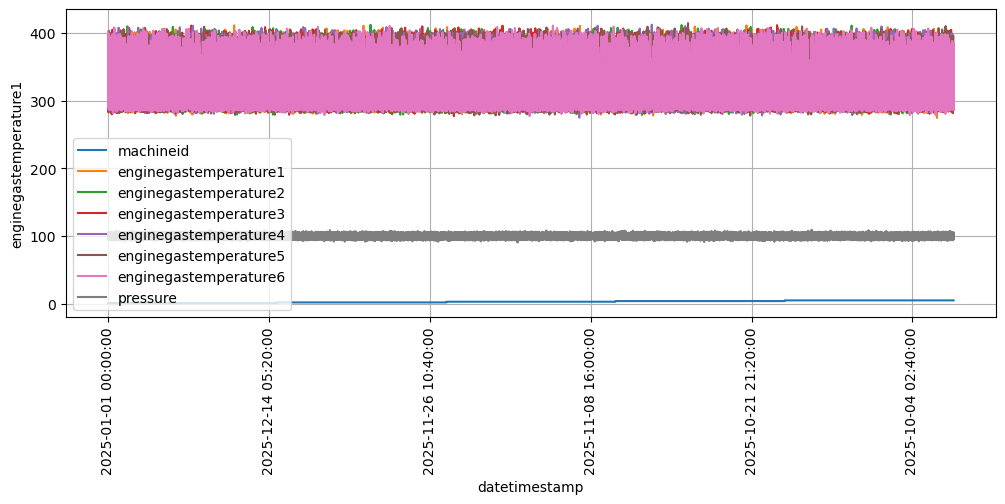

In [18]:
ax =df.plot(figsize=(12,4))
ax.grid()
plt.xticks(rotation=90) 
ax.set_ylabel('enginegastemperature1');

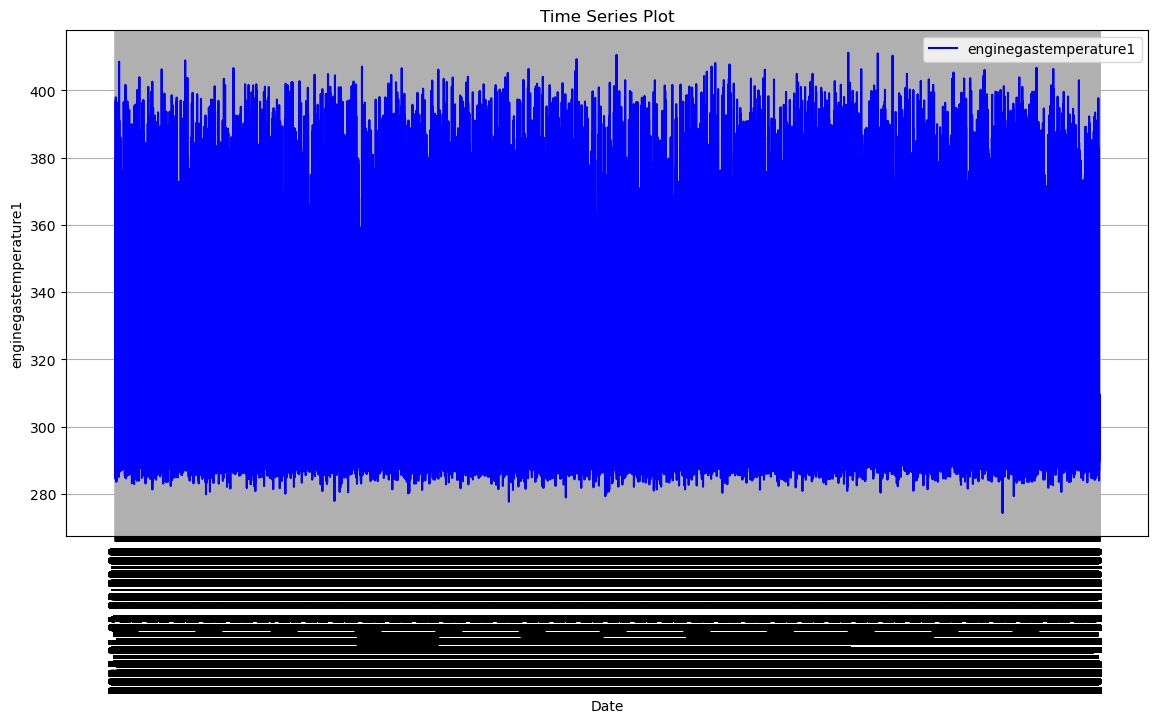

In [19]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['enginegastemperature1'], label='enginegastemperature1', color='blue')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('enginegastemperature1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.xticks(rotation=90) 
plt.show()

## Distribution

In [20]:
columns_plot=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6']
columns=['enginegastemperature1', 'enginegastemperature2','enginegastemperature3', 'enginegastemperature4', 'enginegastemperature5', 'enginegastemperature6','pressure']    

### Histogram

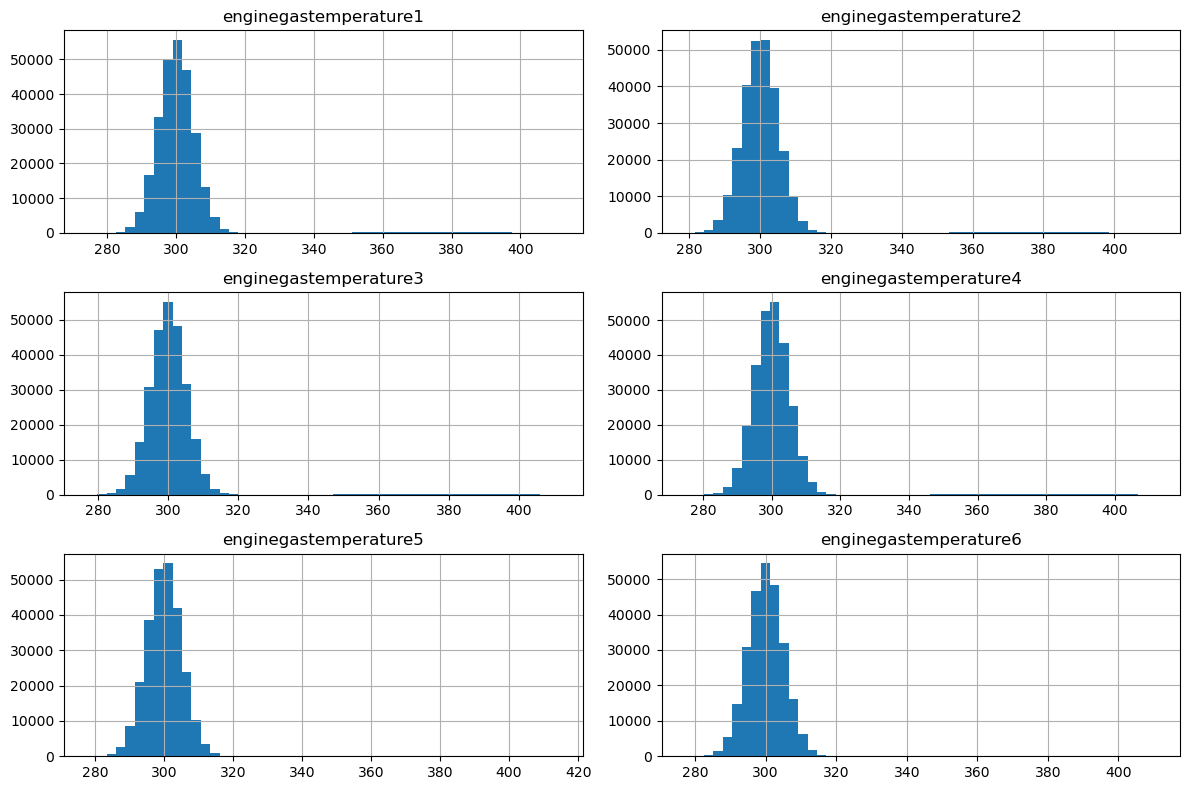

In [21]:
df[columns_plot].hist(figsize=(12, 8), bins=50)
plt.tight_layout()
plt.show()

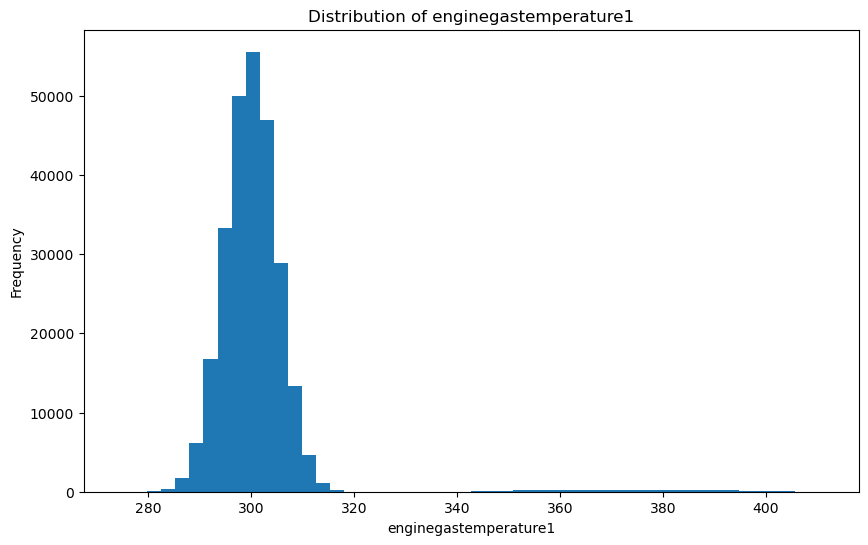

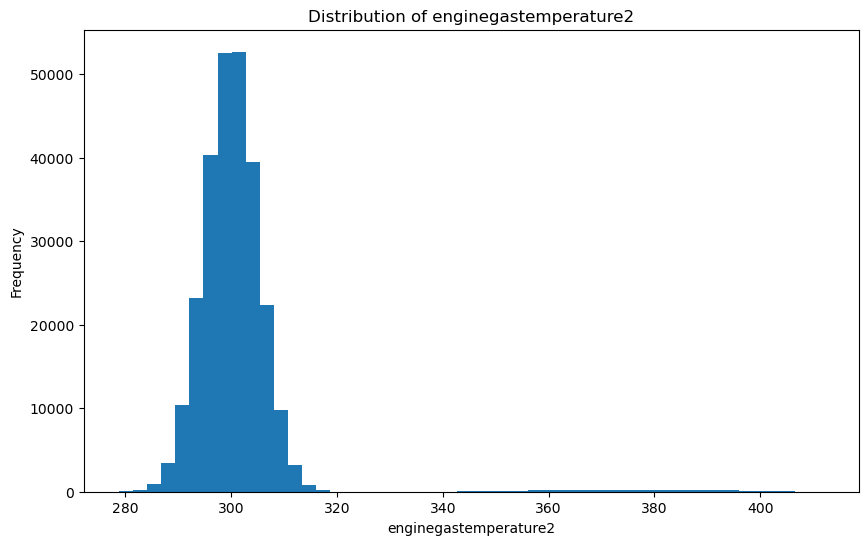

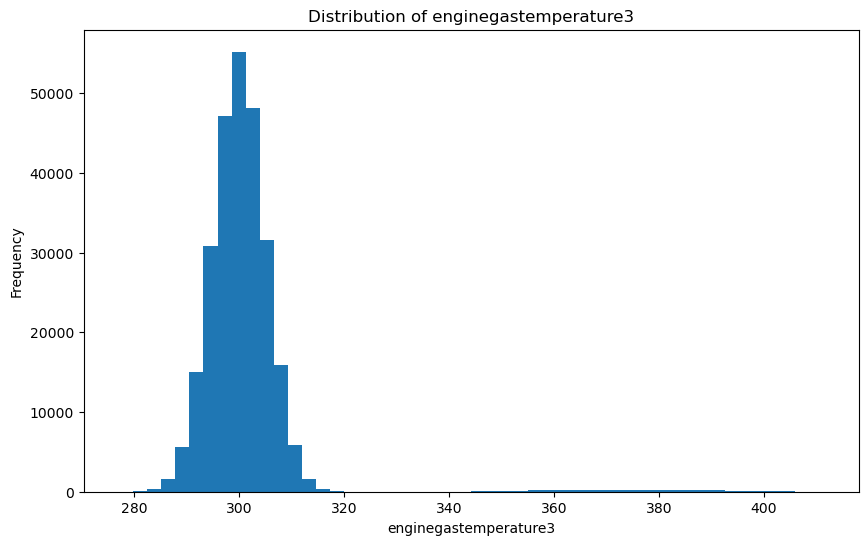

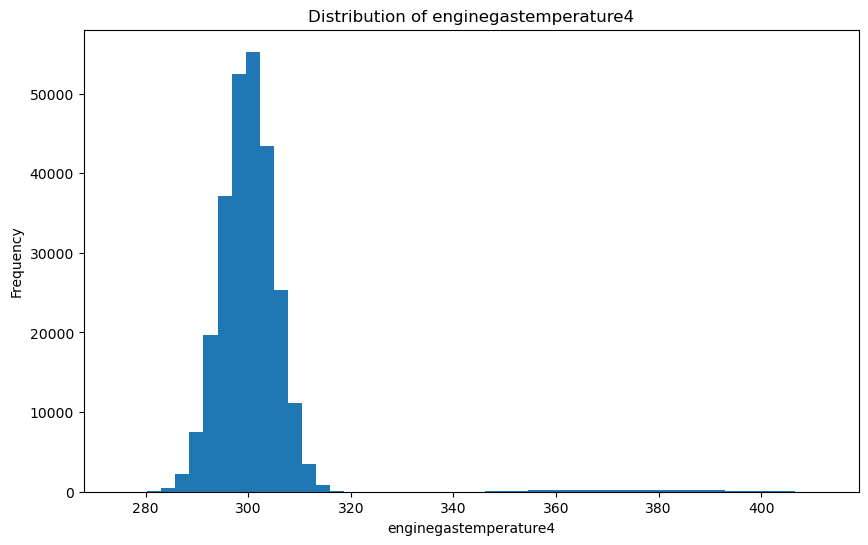

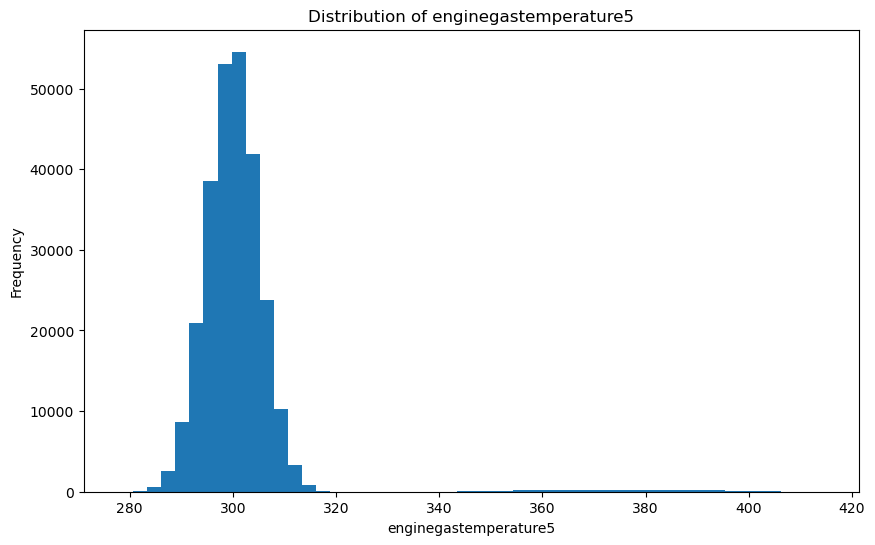

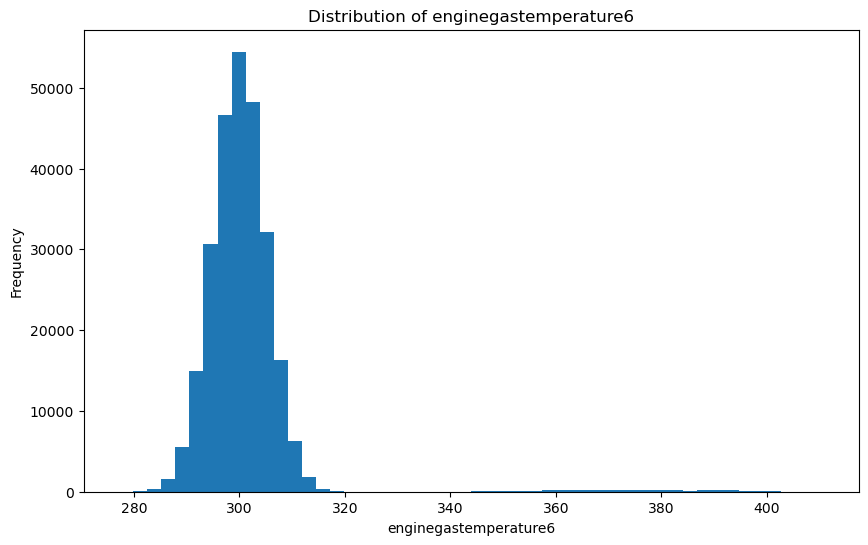

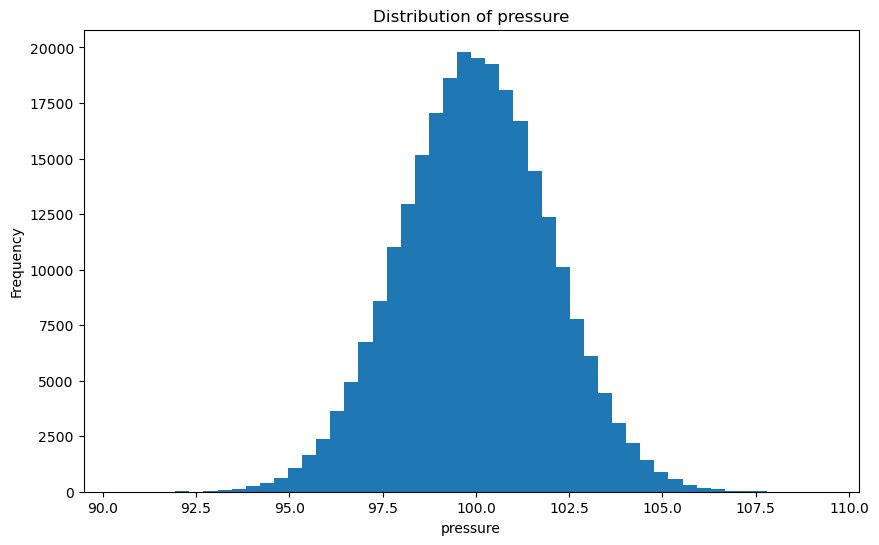

In [22]:
sensor_columns = [f'enginegastemperature{i}' for i in range(1, 7)] + ['pressure']

for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=50)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

### Q-Q Plot

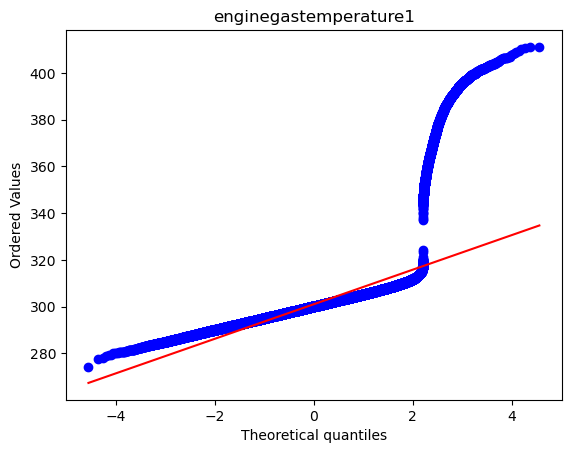

In [23]:
stats.probplot(df['enginegastemperature1'], dist="norm", plot=plt)
plt.title('enginegastemperature1')
plt.show()

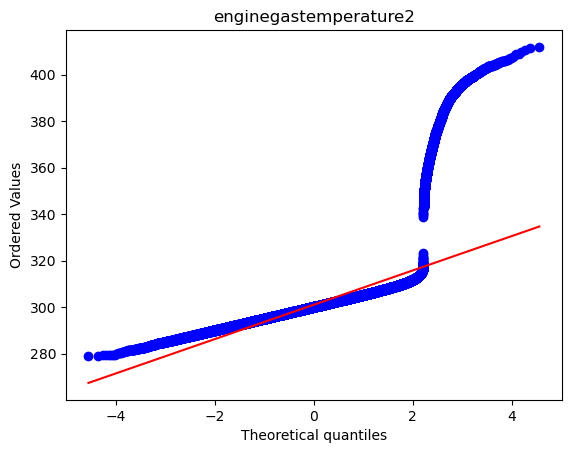

In [24]:
stats.probplot(df['enginegastemperature2'], dist="norm", plot=plt)
plt.title('enginegastemperature2')
plt.show()

### Boxplot (matplotlib)

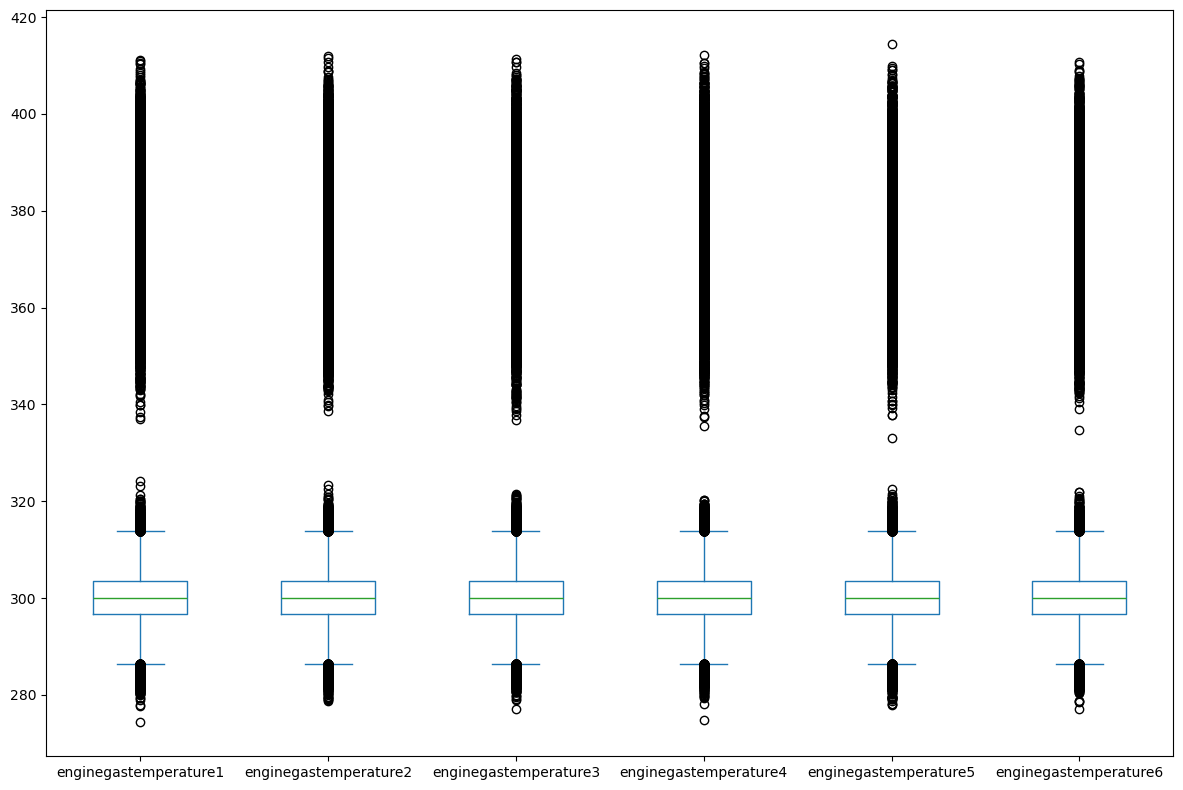

In [25]:
# Visualize distributions of numerical features using box plots
df[columns_plot].plot(kind='box', figsize=(12, 8))
plt.tight_layout()
plt.show()

### Box plot (seaborn)

<Axes: xlabel='enginegastemperature1'>

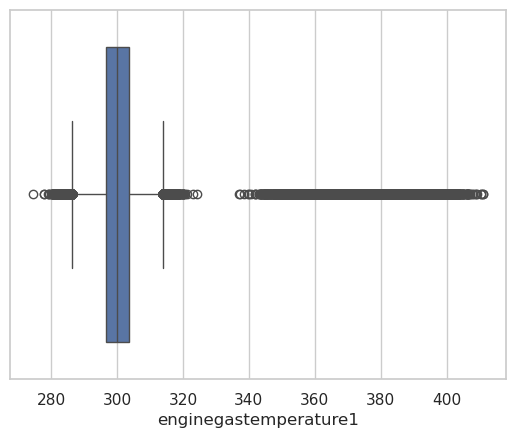

In [26]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, x="enginegastemperature1" ) # hue='machineid'

<Axes: ylabel='enginegastemperature1'>

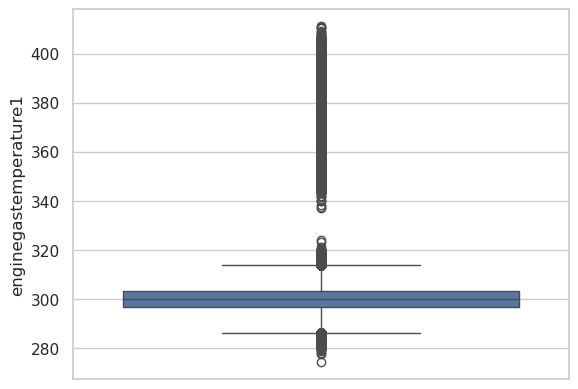

In [27]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="enginegastemperature1" ) # hue='machineid'

<Axes: ylabel='pressure'>

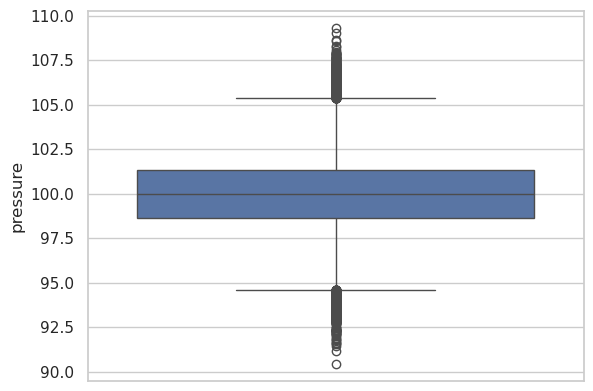

In [28]:
sns.set_theme(style="whitegrid")
sns.boxplot(data=df, y="pressure" ) # hue='machineid'

## Correlation

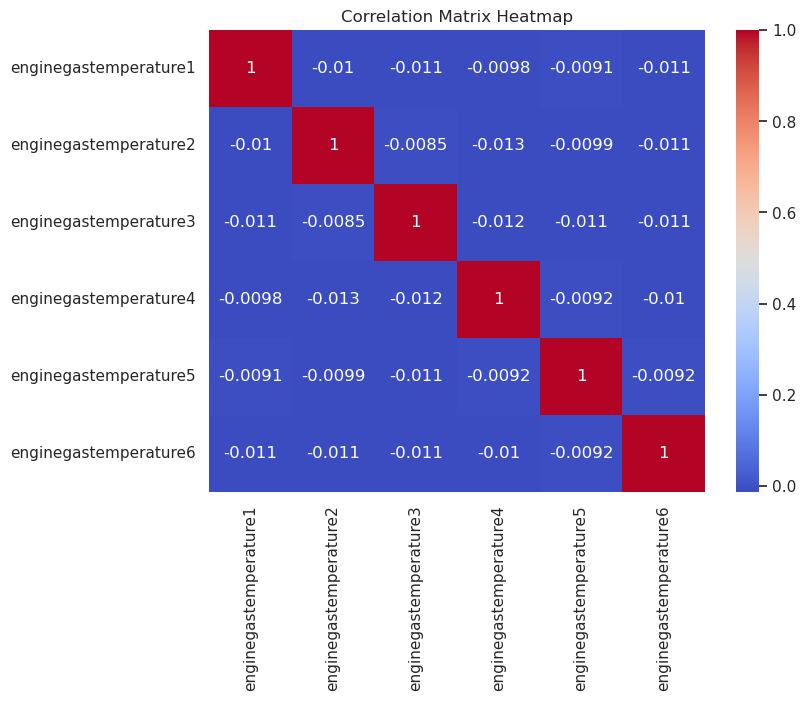

In [29]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns_plot].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

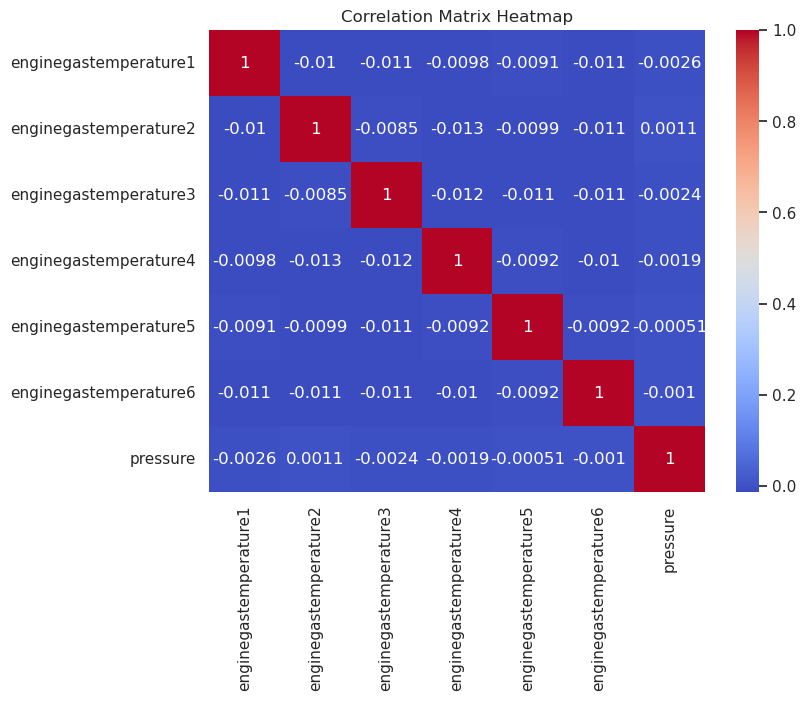

In [30]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

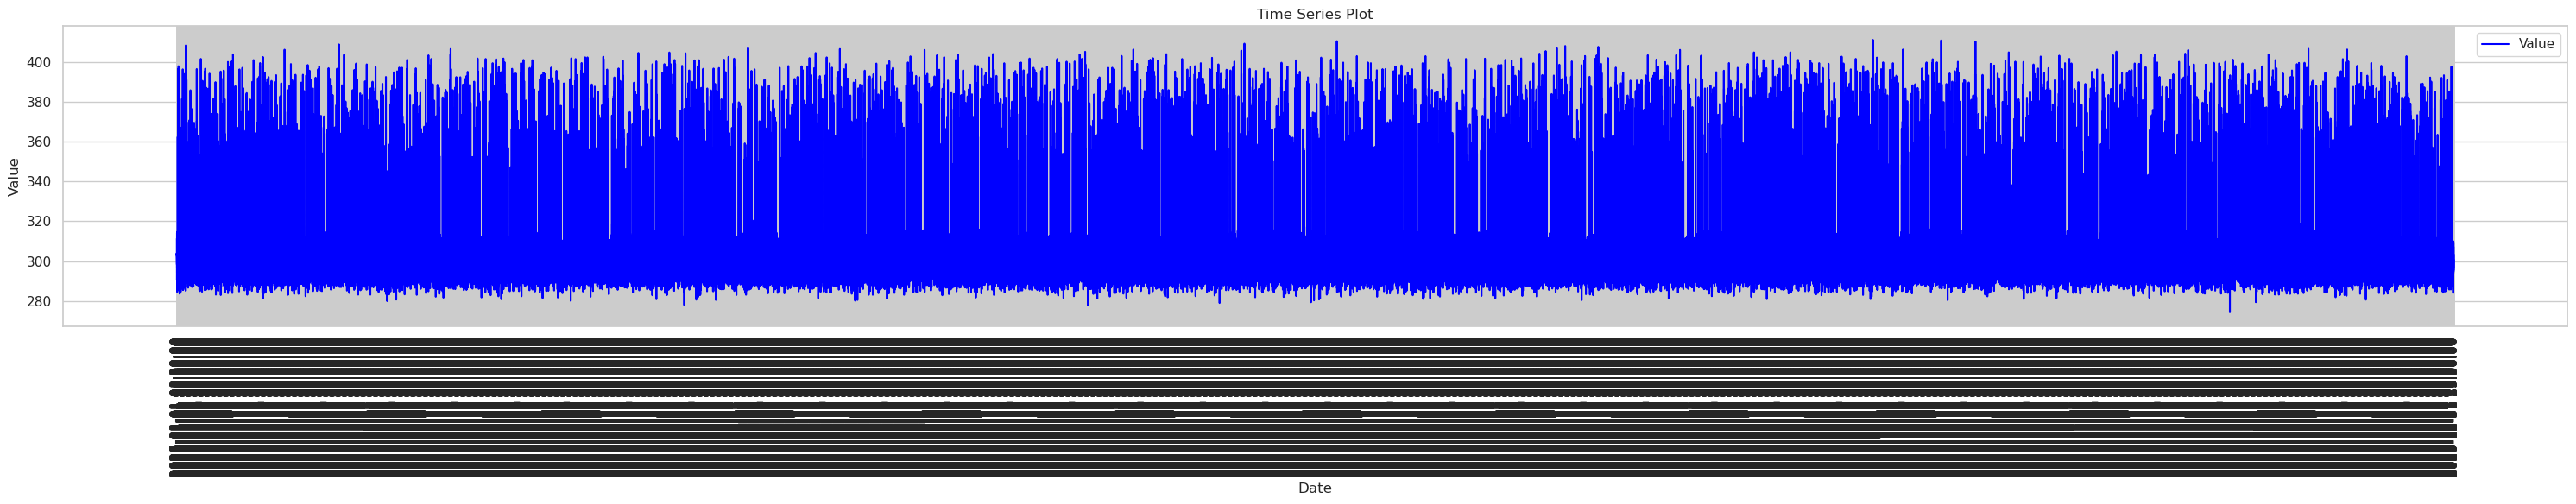

In [35]:
plt.figure(figsize=(30, 6))
plt.plot(df.index, df['enginegastemperature1'], label='Value', color='blue')
plt.xticks(rotation=90)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: xlabel='datetimestamp'>

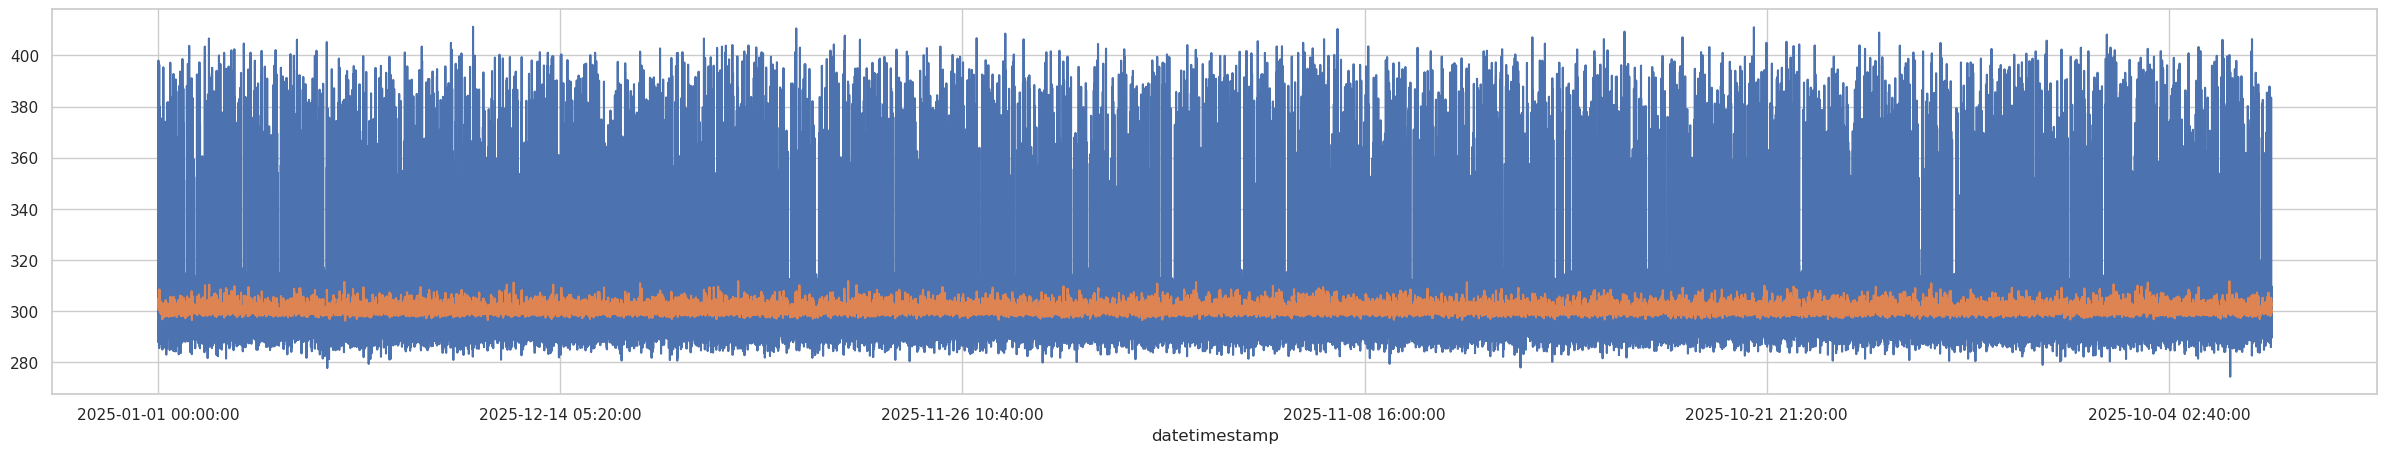

In [33]:
df['enginegastemperature1'].plot(figsize=(30,5))
plt.xticks(rotation=90)
df.rolling(window=30).mean()['enginegastemperature1'].plot()
